## Dataset Overview

**The following dataset was collected during a web development program . It contains data
about selected students who applied for the program . Here is the metadata to give a
description**
### Metadata
Attribute Explanation

<br> Gender -  The specific gender <br>
<br>Location - Where they come from <br>
<br>County Number - County the belong to / International Students<br>
Computer Proficient - Do they have basic computer skills?
Level Of Education - Which level of education they hold
Commitment - If they can commit 2 months to do the program
Access to Device -  Do they have a computer?
Access to Internet - Can they access the Internet to Learn?
Information Gain  - How did they know about the scholarship
Lecturer - Who trained the student?
Selected - Were they selected for the program?
Completed  - Did they complete the program?

## Data Analysis

(Graphical Representations can be bar graphs, pie-charts, swarm plots e.t.c) : Use PYTHON
1. Graphical representation to show the Applications in terms of gender
2. Graphical Representation to show Information Gain
3. Graphical Representation to show Applications in terms of Location/County
4. Graphical Representation to show Applications in terms of Level of education
5. Graphical representation to show how many students completed
6. Graphical representation to show student distribution among the lecturer
7. Graphical representation to show the completion rate for lecturer A , B and E

## Machine Learning
8. Choose a machine learning model & train ; to see if a student will complete
or not.
(Remember to write comments on your code.)


In [466]:
#Import Libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from matplotlib import rcParams
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt

sns.set_style("darkgrid")

## Load the dataset

In [467]:

df = pd.read_csv('Web Dev Cleaned Data (1).csv')

df.head()

,Unnamed: 0,Gender,Location,CountyNumber,computerProficient,Levelofeducation,Commitment,AccestoDevice,AccestoInternet,InformationGain,Completed,Lecturer,Selected
0,0,Male,Nairobi,47.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,yes,A,yes
1,2,Male,Nakuru,32.0,Yes,Freelancer,Yes,Yes,Yes,Email newsletter,no,A,yes
2,4,Male,Nairobi,47.0,Yes,Working,Yes,Yes,Yes,Referral,no,A,yes
3,5,Female,Kiambu,22.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,no,B,yes
4,6,Male,TransNzoia,26.0,Yes,Degree,Yes,Yes,Yes,Media,no,A,yes


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          298 non-null    int64  
 1   Gender              298 non-null    object 
 2   Location            298 non-null    object 
 3   CountyNumber        297 non-null    float64
 4   computerProficient  298 non-null    object 
 5   Levelofeducation    298 non-null    object 
 6   Commitment          298 non-null    object 
 7   AccestoDevice       298 non-null    object 
 8   AccestoInternet     298 non-null    object 
 9   InformationGain     298 non-null    object 
 10  Completed           298 non-null    object 
 11  Lecturer            298 non-null    object 
 12  Selected            298 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 30.4+ KB


In [469]:
df.shape

(298, 13)

In [470]:
df.isna().sum()

Unnamed: 0            0
Gender                0
Location              0
CountyNumber          1
computerProficient    0
Levelofeducation      0
Commitment            0
AccestoDevice         0
AccestoInternet       0
InformationGain       0
Completed             0
Lecturer              0
Selected              0
dtype: int64

## Data Cleaning

In [471]:
#Lets drop the missing value - wont affect the dataset 

df = df.dropna()

In [472]:
df.isna().sum()

Unnamed: 0            0
Gender                0
Location              0
CountyNumber          0
computerProficient    0
Levelofeducation      0
Commitment            0
AccestoDevice         0
AccestoInternet       0
InformationGain       0
Completed             0
Lecturer              0
Selected              0
dtype: int64

In [473]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Location', 'CountyNumber',
       'computerProficient', 'Levelofeducation', 'Commitment ',
       'AccestoDevice', 'AccestoInternet', 'InformationGain', 'Completed ',
       'Lecturer', 'Selected'],
      dtype='object')

In [474]:
#remane column Completed to remove space
df = df.rename(columns={'Completed ': 'Completed'})

In [475]:
#Modify Values in completed column 'yes' to Yes 

df['Completed'] = df['Completed'].replace('yes','Yes')

In [476]:
#Drop the two duplicate columns
df = df.drop(['Unnamed: 0'], axis=1)

In [477]:
#Save the new CSV
df.to_csv('NewWebDev1.csv')

In [478]:
#Import the new CSV For analysis 

df = pd.read_csv('NewWebDev1.csv')
df.head(5)


,Unnamed: 0,Gender,Location,CountyNumber,computerProficient,Levelofeducation,Commitment,AccestoDevice,AccestoInternet,InformationGain,Completed,Lecturer,Selected
0,0,Male,Nairobi,47.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,Yes,A,yes
1,1,Male,Nakuru,32.0,Yes,Freelancer,Yes,Yes,Yes,Email newsletter,no,A,yes
2,2,Male,Nairobi,47.0,Yes,Working,Yes,Yes,Yes,Referral,no,A,yes
3,3,Female,Kiambu,22.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,no,B,yes
4,4,Male,TransNzoia,26.0,Yes,Degree,Yes,Yes,Yes,Media,no,A,yes


## 1. Graphical representation to show the Applications in terms of gender

<AxesSubplot:xlabel='Gender'>

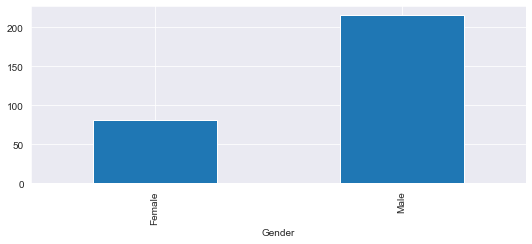

In [479]:
by_gender = df.groupby('Gender')
by_gender.size().plot(kind='bar')

## 2 .Graphical Representation to show Information Gain

<AxesSubplot:>

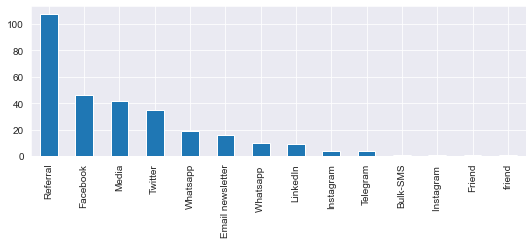

In [480]:
# Plot frequency
df['InformationGain'].value_counts().plot.bar()


## 3. Graphical Representation to show Applications in terms of Location/County

In [493]:
df_location = df.groupby(['Location'])['Location'].count().reset_index(name='count')

import plotly.express as px
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = px.pie(df_location, values='count', names='Location', title='Applications in terms of Location/County')
fig.show()

In [482]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## 4.Graphical Representation to show Applications in terms of Level of education

In [483]:
df.head()

,Unnamed: 0,Gender,Location,CountyNumber,computerProficient,Levelofeducation,Commitment,AccestoDevice,AccestoInternet,InformationGain,Completed,Lecturer,Selected
0,0,Male,Nairobi,47.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,Yes,A,yes
1,1,Male,Nakuru,32.0,Yes,Freelancer,Yes,Yes,Yes,Email newsletter,no,A,yes
2,2,Male,Nairobi,47.0,Yes,Working,Yes,Yes,Yes,Referral,no,A,yes
3,3,Female,Kiambu,22.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,no,B,yes
4,4,Male,TransNzoia,26.0,Yes,Degree,Yes,Yes,Yes,Media,no,A,yes


In [484]:
df_education = df.groupby(['Levelofeducation'])['Levelofeducation'].count().reset_index(name='count')
df_education

,Levelofeducation,count
0,Certificate,14
1,Degree,186
2,Diploma,23
3,Freelancer,13
4,Masters,5
5,Not Indicated,17
6,Working,39


In [485]:
df_education = df.groupby(['Levelofeducation'])['Levelofeducation'].count().reset_index(name='count')

import plotly.express as px

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = px.pie(df_education, values='count', names='Levelofeducation', title='Applications in terms of Levelofeducation')
fig.show()

## 5. Graphical representation to show how many students completed

In [486]:
df.head(2)

,Unnamed: 0,Gender,Location,CountyNumber,computerProficient,Levelofeducation,Commitment,AccestoDevice,AccestoInternet,InformationGain,Completed,Lecturer,Selected
0,0,Male,Nairobi,47.0,Yes,Degree,Yes,Yes,Yes,Email newsletter,Yes,A,yes
1,1,Male,Nakuru,32.0,Yes,Freelancer,Yes,Yes,Yes,Email newsletter,no,A,yes


In [487]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Location', 'CountyNumber',
       'computerProficient', 'Levelofeducation', 'Commitment ',
       'AccestoDevice', 'AccestoInternet', 'InformationGain', 'Completed',
       'Lecturer', 'Selected'],
      dtype='object')

<AxesSubplot:xlabel='Completed'>

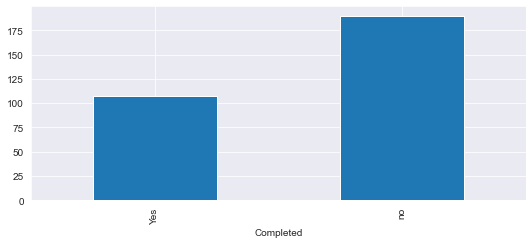

In [488]:
Completed = df.groupby('Completed')
Completed.size().plot(kind='bar')

## 6 .Graphical representation to show student distribution among the lecturer


<AxesSubplot:>

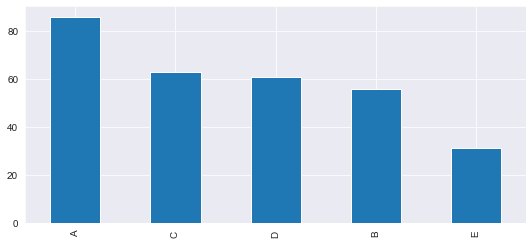

In [489]:
df['Lecturer'].value_counts().plot(kind='bar')

## 7.Graphical representation to show the completion rate for lecturer A , B and E

<BarContainer object of 10 artists>

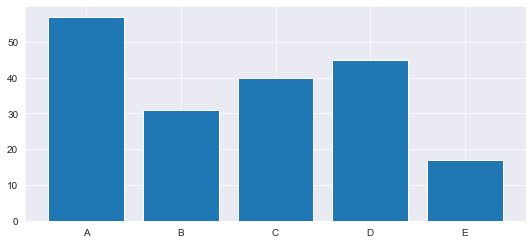

In [490]:
#completion_rate  = df.groupby("Lecturer").sum().sort_values(by="Completed")
#completion_rate 

g = df.groupby(['Lecturer', 'Completed']).size().reset_index(name='count')
plt.bar(g['Lecturer'],g['count'])

## 8. Choose a machine learning model & train ; to see if a student will complete or not

## Data Preparation:

Split the data into X and y.

In [505]:
#Columns to use 
df.dtypes

Unnamed: 0              int64
Gender                 object
Location               object
CountyNumber          float64
computerProficient     object
Levelofeducation       object
Commitment             object
AccestoDevice          object
AccestoInternet        object
InformationGain        object
Completed              object
Lecturer               object
Selected               object
dtype: object

In [509]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(X)

categorical_columns = ['Gender', 'Location', 
       'computerProficient', 'Levelofeducation', 'Commitment ',
       'AccestoDevice', 'AccestoInternet', 'InformationGain', 'Completed ',
       'Lecturer']

numerical_columns = ['CountyNumber']
make_column_transformer(
...     (StandardScaler(), [numerical_columns]),
...     (OneHotEncoder(), [categorical_column]))
ColumnTransformer(transformers=[('standardscaler', StandardScaler(...),
                                 [numerical_columns]),
                                ('onehotencoder', OneHotEncoder(...),
                                 [categorical_columns])])

<>:14: SyntaxWarning:

'ellipsis' object is not callable; perhaps you missed a comma?

<>:15: SyntaxWarning:

'ellipsis' object is not callable; perhaps you missed a comma?

<>:14: SyntaxWarning:

'ellipsis' object is not callable; perhaps you missed a comma?

<>:15: SyntaxWarning:

'ellipsis' object is not callable; perhaps you missed a comma?



ValueError: could not convert string to float: 'Gender'

In [508]:
#Split data into X and Y 

from sklearn.model_selection import train_test_split 

X = categorical_columns
Y = df['Completed']

print(X.columns)

AttributeError: 'list' object has no attribute 'columns'

In [ ]:
# scaling the features
#Convert the dataframe to an array by scaling 
from sklearn.preprocessing import scale


cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

In [ ]:
# split data into train and test datasets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
#1.Linear model from sklean 
#Building the first model with all the feature

from sklearn import linear_model 
from sklearn.metrics import r2_score 
 
lm = linear_model.LinearRegression() 
lm.fit(X_train, y_train) 
y_pred = lm.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_pred)) 